# 0. 라이브러리 및 데이터 준비

[Spotify Dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_by_genres_o.csv)

In [1]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## 데이터 불러오기
## Spotify 
spotify_df = pd.read_csv("./data/tracks.csv")

In [3]:
## Organize dataset : Modify [''] to nan in artists and format of release_date
df                 = spotify_df.copy()
df.artists         = df.artists.replace("['']", np.nan)
df['release_date'] = pd.to_datetime(df['release_date'])
df['year']         = df['release_date'].dt.year
df['duration']     = df['duration_ms']/60000

In [4]:
## Duration average over year
df_columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 
              'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


# 1. Feature 간 상관관계 및 EDA

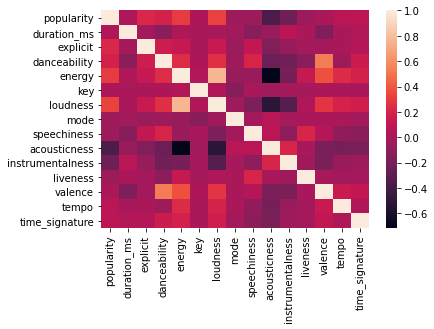

In [5]:
## Correlation
sns.heatmap(spotify_df.corr())
plt.show()

## 1) 연도별 분석

In [6]:
year_ = [i for i in range(1900, 2020, 10)]
year_

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

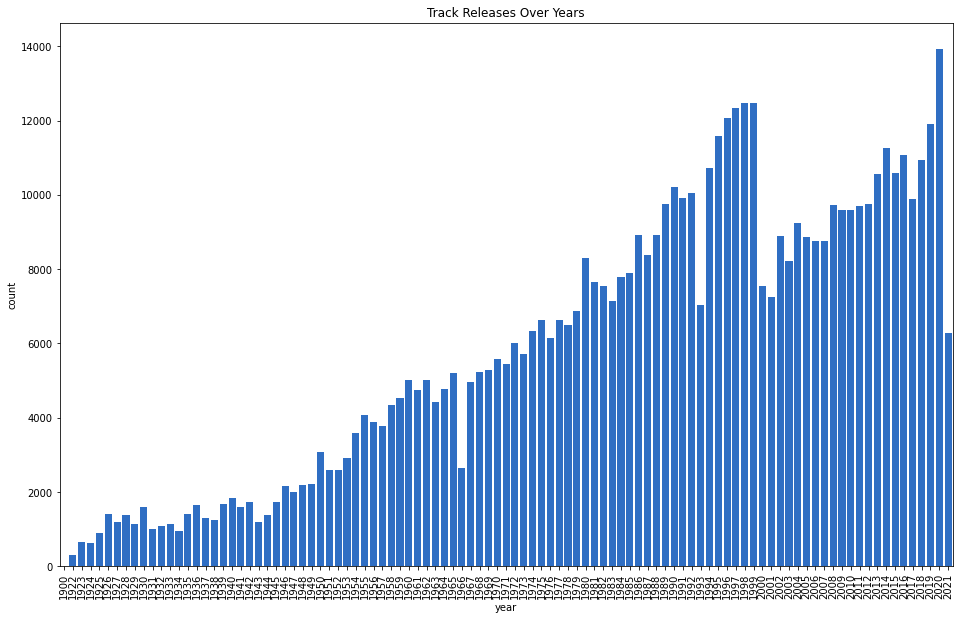

In [7]:
## Count
df['year'] = df['release_date'].dt.year
base_color = sns.color_palette()[0]
plt.figure(figsize = [16, 10])
plt.xticks(rotation=90)
plt.title('Track Releases Over Years')
sns.countplot(data=df, x='year', color='#166ADC')
plt.show()

In [8]:
year_df = df.groupby('year').mean()
year_index = list(year_df.index)

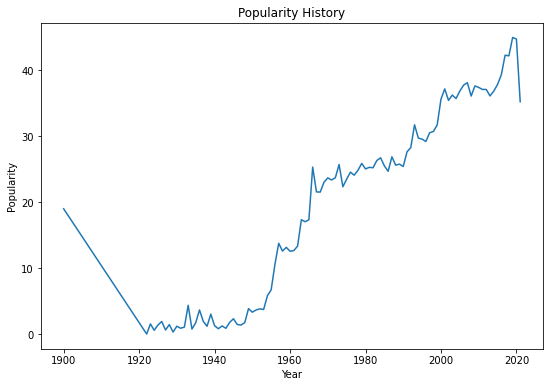

In [9]:
## Popularity
plt.figure(figsize=[9, 6])
plt.plot(year_df.index, year_df[['popularity']])
plt.title('Popularity History')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

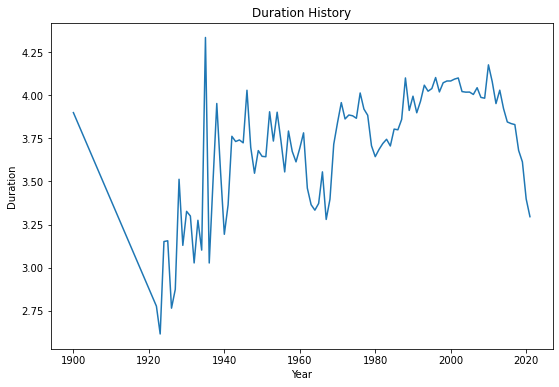

In [10]:
plt.figure(figsize=[9, 6])
plt.plot(year_df.index, year_df[['duration_ms']]/60000)
plt.title('Duration History')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.show()

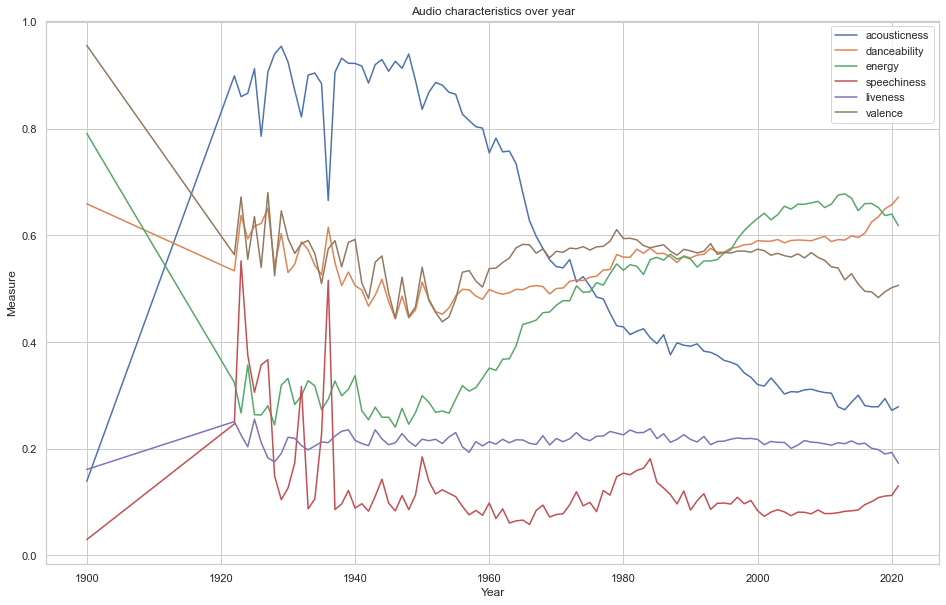

In [11]:
## Audio characteristics over year
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col);
ax.set_title('Audio characteristics over year');
ax.set_ylabel('Measure');
ax.set_xlabel('Year');

plt.savefig(f'./eda_output/line.year_audiofeatures.png')

## 2) Key & Mode

In [12]:
df_keys_mode = df.copy()
keys = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
for idx, k in enumerate(keys) : #{
    df_keys_mode['key'] = df_keys_mode['key'].replace([idx], k)
#}

keys = ["minor", "major"]
for idx, k in enumerate(keys) : #{
    df_keys_mode['mode'] = df_keys_mode['mode'].replace([idx], k)
#}

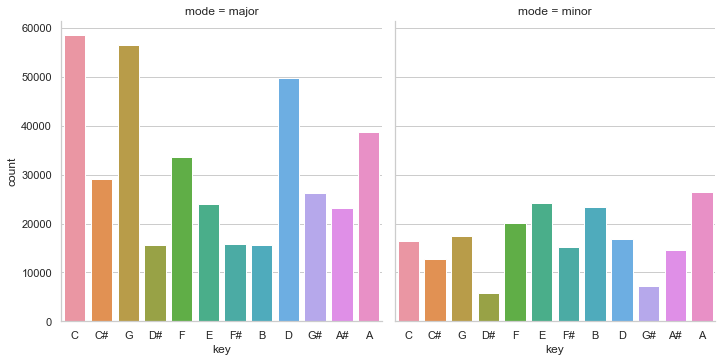

In [13]:
sns.catplot(x='key', col='mode', kind='count', data=df_keys_mode)
plt.show()

In [14]:
df_keys_mode.groupby('key').mean()['popularity']

key
A     28.070968
A#    26.527446
B     29.991388
C     26.985844
C#    29.790732
D     27.152242
D#    23.807569
E     28.097345
F     25.784385
F#    30.094244
G     27.043725
G#    27.663688
Name: popularity, dtype: float64

In [15]:
df_keys_mode.groupby('mode').mean()['popularity']

mode
major    27.125116
minor    28.429142
Name: popularity, dtype: float64

## 3) 두 Feature 간 분포

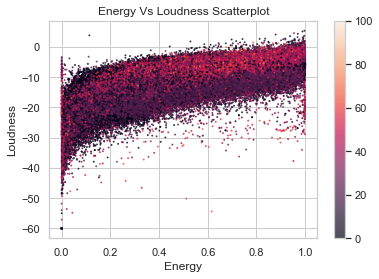

In [16]:
plt.title('Energy Vs Loudness Scatterplot')
plt.scatter(df['energy'], df['loudness'], c=df['popularity'], s=1, alpha=.7)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.colorbar()
plt.show()

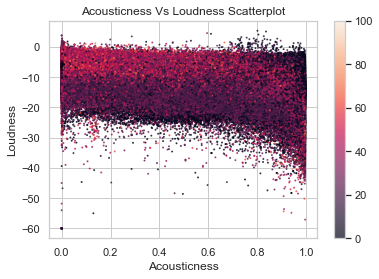

In [17]:
plt.title('Acousticness Vs Loudness Scatterplot')
plt.scatter(df['acousticness'], df['loudness'], c=df['popularity'], s=1, alpha=.7)
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.colorbar()
plt.show()

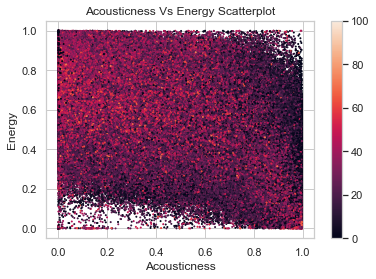

In [18]:
plt.title('Acousticness Vs Energy Scatterplot')
plt.scatter(df['acousticness'], df['energy'], c=df['popularity'], s=1)
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.colorbar()
plt.show()

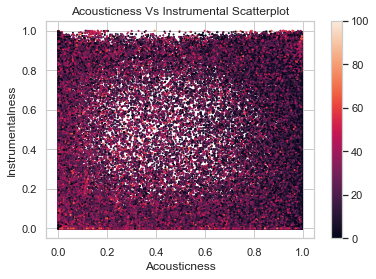

In [19]:
plt.title('Acousticness Vs Instrumental Scatterplot')
plt.scatter(df['acousticness'], df['instrumentalness'], c=df['popularity'], s=1)
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.colorbar()
plt.show()